In [1]:
import numpy as np

import json 
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

# Compare Sampling

In [3]:
with open('results/uncert_svm_embeddings.json', 'r') as openfile:
    uncert_svm_embeddings = json.load(openfile)

In [12]:
dps_uncert = [val for row in uncert_svm_embeddings["labeld_dps"] for val in row][:50]

In [13]:
embeddings_train = np.genfromtxt("reuters_train_embeddings.csv", delimiter=",")

In [14]:
kmeans = KMeans(
    init="random",
    n_clusters=50,
    n_init=10,
    max_iter=300,
    random_state=42)

kmeans.fit(embeddings_train)
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, embeddings_train)

In [10]:
umap_obj = umap.UMAP(n_neighbors=50, min_dist=0.3, n_components=2)

embeddings_train_umap = umap_obj.fit_transform(embeddings_train)

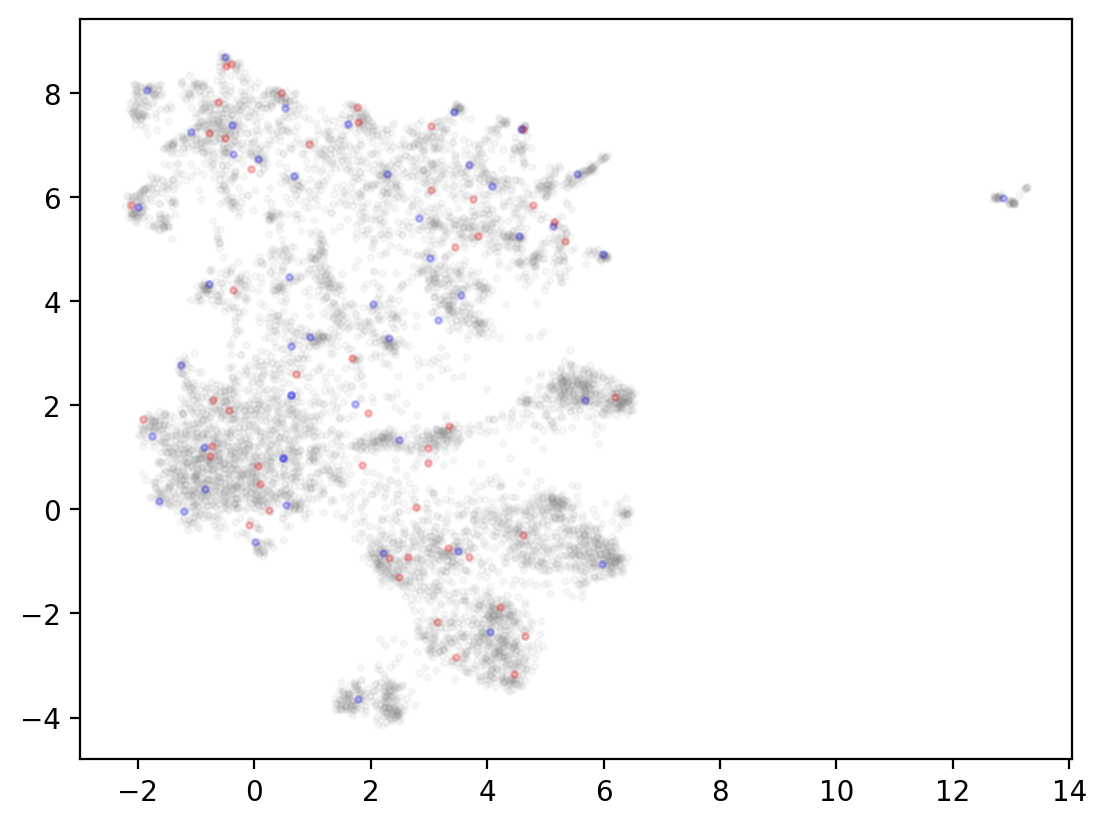

In [15]:
import matplotlib.pyplot as plt

plt.scatter(embeddings_train_umap[:,0], embeddings_train_umap[:,1], color='grey', alpha = 0.05, s = 5, edgecolor = None)

for i in dps_uncert:
    plt.scatter(embeddings_train_umap[i,0], embeddings_train_umap[i,1], color='red', alpha = 0.2, s = 5, edgecolor = None)
    
for i in closest:
    plt.scatter(embeddings_train_umap[i,0], embeddings_train_umap[i,1], color='blue', alpha = 0.2, s = 5, edgecolor = None)

plt.rcParams['figure.dpi'] = 200
    
plt.show()

# Results Paper

In [2]:
with open('results/uncert_svm_embeddings.json', 'r') as openfile:
    uncert_svm_embeddings = json.load(openfile)
with open('results/uncert_svm_embeddings_1.json', 'r') as openfile:
    uncert_svm_embeddings_1 = json.load(openfile)
with open('results/uncert_svm_embeddings_2.json', 'r') as openfile:
    uncert_svm_embeddings_2 = json.load(openfile)
    
with open('results/uncert_svm_bow.json', 'r') as openfile:
    uncert_svm_bow = json.load(openfile)
with open('results/uncert_svm_bow_1.json', 'r') as openfile:
    uncert_svm_bow_1 = json.load(openfile)
with open('results/uncert_svm_bow_2.json', 'r') as openfile:
    uncert_svm_bow_2 = json.load(openfile)
    
with open('results/kmsubset_svm_bow.json', 'r') as openfile:
    kmsubset_svm_bow = json.load(openfile)        
with open('results/kmsubset_svm_embeddings.json', 'r') as openfile:
    kmsubset_svm_embeddings = json.load(openfile)
    
with open('results/kmsubset_xgb_bow.json', 'r') as openfile:
    kmsubset_xgb_bow = json.load(openfile)   
with open('results/kmsubset_xgb_embeddings.json', 'r') as openfile:
    kmsubset_xgb_embeddings = json.load(openfile)
    
with open('results/kmsubset_transformer_50.json', 'r') as openfile:
    kmsubset_transformer_50 = json.load(openfile)

C:\Users\phili\AppData\Local\Temp\ipykernel_23764\3875448208.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


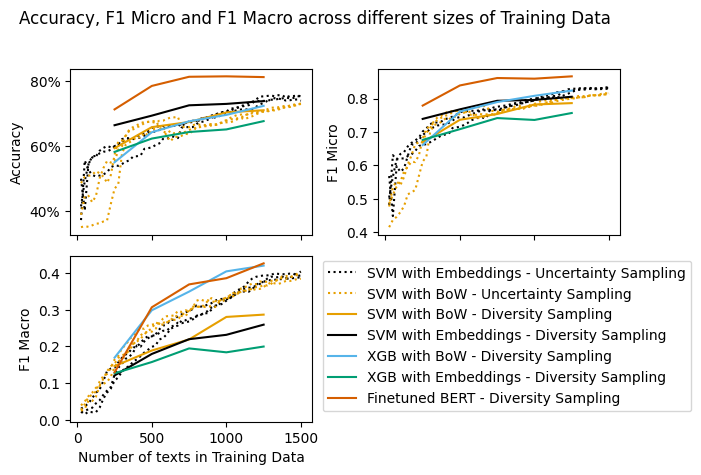

In [18]:
fig, axs = plt.subplots(2,2, sharex=True, dpi = 100)

# Accuracy plot
axs[0,0].set_ylabel("Accuracy")
fig.suptitle("Accuracy, F1 Micro and F1 Macro across different sizes of Training Data\n")

axs[0,0].plot(uncert_svm_embeddings["n"], uncert_svm_embeddings["accuracy"], c = "#000000", linestyle = "dotted", label = "SVM with Embeddings - Uncertainty Sampling")
axs[0,0].plot(uncert_svm_embeddings_1["n"], uncert_svm_embeddings_1["accuracy"], c = "#000000", linestyle = "dotted")
axs[0,0].plot(uncert_svm_embeddings_2["n"], uncert_svm_embeddings_2["accuracy"], c = "#000000", linestyle = "dotted")

axs[0,0].plot(uncert_svm_bow["n"], uncert_svm_bow["accuracy"], c = "#E69F00", linestyle = "dotted", label = "SVM with BoW - Uncertainty Sampling")
axs[0,0].plot(uncert_svm_bow_1["n"], uncert_svm_bow_1["accuracy"], c = "#E69F00", linestyle = "dotted")
axs[0,0].plot(uncert_svm_bow_2["n"], uncert_svm_bow_2["accuracy"], c = "#E69F00", linestyle = "dotted")

axs[0,0].plot(kmsubset_svm_bow["n"], kmsubset_svm_bow["accuracy"], c = "#E69F00", linestyle = "solid", label = "SVM with BoW - Diversity Sampling")
axs[0,0].plot(kmsubset_svm_embeddings["n"], kmsubset_svm_embeddings["accuracy"], c = "#000000", linestyle = "solid", label = "SVM with Embeddings - Diversity Sampling")

axs[0,0].plot(kmsubset_xgb_bow["n"], kmsubset_xgb_bow["accuracy"], c = "#56B4E9", linestyle = "solid", label = "XGB with BoW - Diversity Sampling")
axs[0,0].plot(kmsubset_xgb_embeddings["n"], kmsubset_xgb_embeddings["accuracy"], c = "#009E73", linestyle = "solid", label = "XGB with Embeddings - Diversity Sampling")

axs[0,0].plot(kmsubset_transformer_50["n"], kmsubset_transformer_50["accuracy"], c = "#D55E00", linestyle = "solid", label = "Finetuned BERT - Diversity Sampling")

axs[0,0].set_yticks([.4,.6,.8])
axs[0,0].set_yticklabels(["40%","60%","80%"])

axs[1,1].remove()

fig.legend(loc='center', bbox_to_anchor=(.8,.3))

# F1 Micro
axs[0,1].set_ylabel("F1 Micro")

axs[0,1].plot(uncert_svm_embeddings["n"], uncert_svm_embeddings["f1_micro"], c = "#000000", linestyle = "dotted", label = "SVM with Embeddings - Uncertainty Sampling")
axs[0,1].plot(uncert_svm_embeddings_1["n"], uncert_svm_embeddings_1["f1_micro"], c = "#000000", linestyle = "dotted")
axs[0,1].plot(uncert_svm_embeddings_2["n"], uncert_svm_embeddings_2["f1_micro"], c = "#000000", linestyle = "dotted")

axs[0,1].plot(uncert_svm_bow["n"], uncert_svm_bow["f1_micro"], c = "#E69F00", linestyle = "dotted", label = "SVM with BoW - Uncertainty Sampling")
axs[0,1].plot(uncert_svm_bow_1["n"], uncert_svm_bow_1["f1_micro"], c = "#E69F00", linestyle = "dotted")
axs[0,1].plot(uncert_svm_bow_2["n"], uncert_svm_bow_2["f1_micro"], c = "#E69F00", linestyle = "dotted")

axs[0,1].plot(kmsubset_svm_bow["n"], kmsubset_svm_bow["f1_micro"], c = "#E69F00", linestyle = "solid", label = "SVM with BoW - Diversity Sampling")
axs[0,1].plot(kmsubset_svm_embeddings["n"], kmsubset_svm_embeddings["f1_micro"], c = "#000000", linestyle = "solid", label = "SVM with Embeddings - Diversity Sampling")

axs[0,1].plot(kmsubset_xgb_bow["n"], kmsubset_xgb_bow["f1_micro"], c = "#56B4E9", linestyle = "solid", label = "XGB with BoW - Diversity Sampling")
axs[0,1].plot(kmsubset_xgb_embeddings["n"], kmsubset_xgb_embeddings["f1_micro"], c = "#009E73", linestyle = "solid", label = "XGB with Embeddings - Diversity Sampling")

axs[0,1].plot(kmsubset_transformer_50["n"], kmsubset_transformer_50["f1_micro"], c = "#D55E00", linestyle = "solid", label = "Finetuned BERT - Diversity Sampling")

# F1 Macro
axs[1,0].set_ylabel("F1 Macro")

axs[1,0].plot(uncert_svm_embeddings["n"], uncert_svm_embeddings["f1_macro"], c = "#000000", linestyle = "dotted", label = "SVM with Embeddings - Uncertainty Sampling")
axs[1,0].plot(uncert_svm_embeddings_1["n"], uncert_svm_embeddings_1["f1_macro"], c = "#000000", linestyle = "dotted")
axs[1,0].plot(uncert_svm_embeddings_2["n"], uncert_svm_embeddings_2["f1_macro"], c = "#000000", linestyle = "dotted")

axs[1,0].plot(uncert_svm_bow["n"], uncert_svm_bow["f1_macro"], c = "#E69F00", linestyle = "dotted", label = "SVM with BoW - Uncertainty Sampling")
axs[1,0].plot(uncert_svm_bow_1["n"], uncert_svm_bow_1["f1_macro"], c = "#E69F00", linestyle = "dotted")
axs[1,0].plot(uncert_svm_bow_2["n"], uncert_svm_bow_2["f1_macro"], c = "#E69F00", linestyle = "dotted")

axs[1,0].plot(kmsubset_svm_bow["n"], kmsubset_svm_bow["f1_macro"], c = "#E69F00", linestyle = "solid", label = "SVM with BoW - Diversity Sampling")
axs[1,0].plot(kmsubset_svm_embeddings["n"], kmsubset_svm_embeddings["f1_macro"], c = "#000000", linestyle = "solid", label = "SVM with Embeddings - Diversity Sampling")

axs[1,0].plot(kmsubset_xgb_bow["n"], kmsubset_xgb_bow["f1_macro"], c = "#56B4E9", linestyle = "solid", label = "XGB with BoW - Diversity Sampling")
axs[1,0].plot(kmsubset_xgb_embeddings["n"], kmsubset_xgb_embeddings["f1_macro"], c = "#009E73", linestyle = "solid", label = "XGB with Embeddings - Diversity Sampling")

axs[1,0].plot(kmsubset_transformer_50["n"], kmsubset_transformer_50["f1_macro"], c = "#D55E00", linestyle = "solid", label = "Finetuned BERT - Diversity Sampling")

axs[1,0].set_xlabel("Number of texts in Training Data")

plt.tight_layout()

fig.show()

(0.35, 0.9)

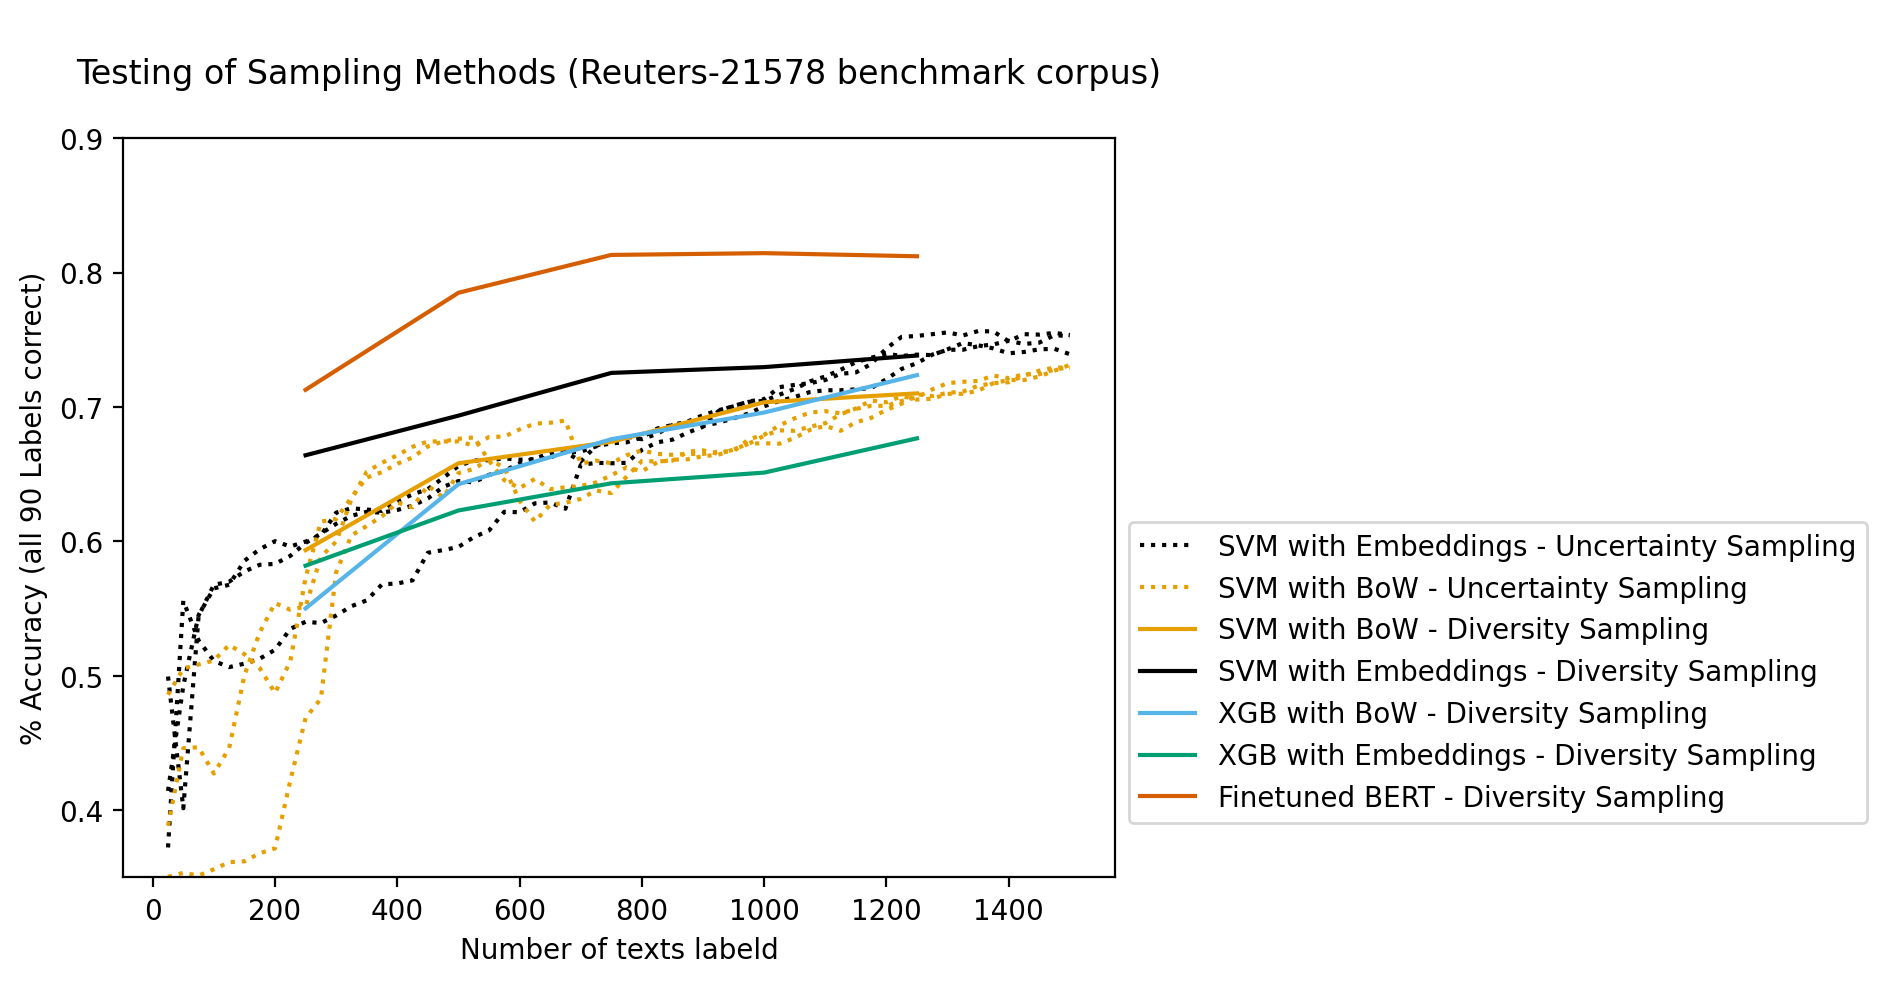

In [17]:
plt.plot(uncert_svm_embeddings["n"], uncert_svm_embeddings["accuracy"], c = "#000000", linestyle = "dotted", label = "SVM with Embeddings - Uncertainty Sampling")
plt.plot(uncert_svm_embeddings_1["n"], uncert_svm_embeddings_1["accuracy"], c = "#000000", linestyle = "dotted")
plt.plot(uncert_svm_embeddings_2["n"], uncert_svm_embeddings_2["accuracy"], c = "#000000", linestyle = "dotted")

plt.plot(uncert_svm_bow["n"], uncert_svm_bow["accuracy"], c = "#E69F00", linestyle = "dotted", label = "SVM with BoW - Uncertainty Sampling")
plt.plot(uncert_svm_bow_1["n"], uncert_svm_bow_1["accuracy"], c = "#E69F00", linestyle = "dotted")
plt.plot(uncert_svm_bow_2["n"], uncert_svm_bow_2["accuracy"], c = "#E69F00", linestyle = "dotted")

plt.plot(kmsubset_svm_bow["n"], kmsubset_svm_bow["accuracy"], c = "#E69F00", linestyle = "solid", label = "SVM with BoW - Diversity Sampling")
plt.plot(kmsubset_svm_embeddings["n"], kmsubset_svm_embeddings["accuracy"], c = "#000000", linestyle = "solid", label = "SVM with Embeddings - Diversity Sampling")

plt.plot(kmsubset_xgb_bow["n"], kmsubset_xgb_bow["accuracy"], c = "#56B4E9", linestyle = "solid", label = "XGB with BoW - Diversity Sampling")
plt.plot(kmsubset_xgb_embeddings["n"], kmsubset_xgb_embeddings["accuracy"], c = "#009E73", linestyle = "solid", label = "XGB with Embeddings - Diversity Sampling")

plt.plot(kmsubset_transformer_50["n"], kmsubset_transformer_50["accuracy"], c = "#D55E00", linestyle = "solid", label = "Finetuned BERT - Diversity Sampling")

plt.title("\nTesting of Sampling Methods (Reuters-21578 benchmark corpus)\n")
plt.xlabel("Number of texts labeld")
plt.ylabel("% Accuracy (all 90 Labels correct)")

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

(0.5, 0.9)

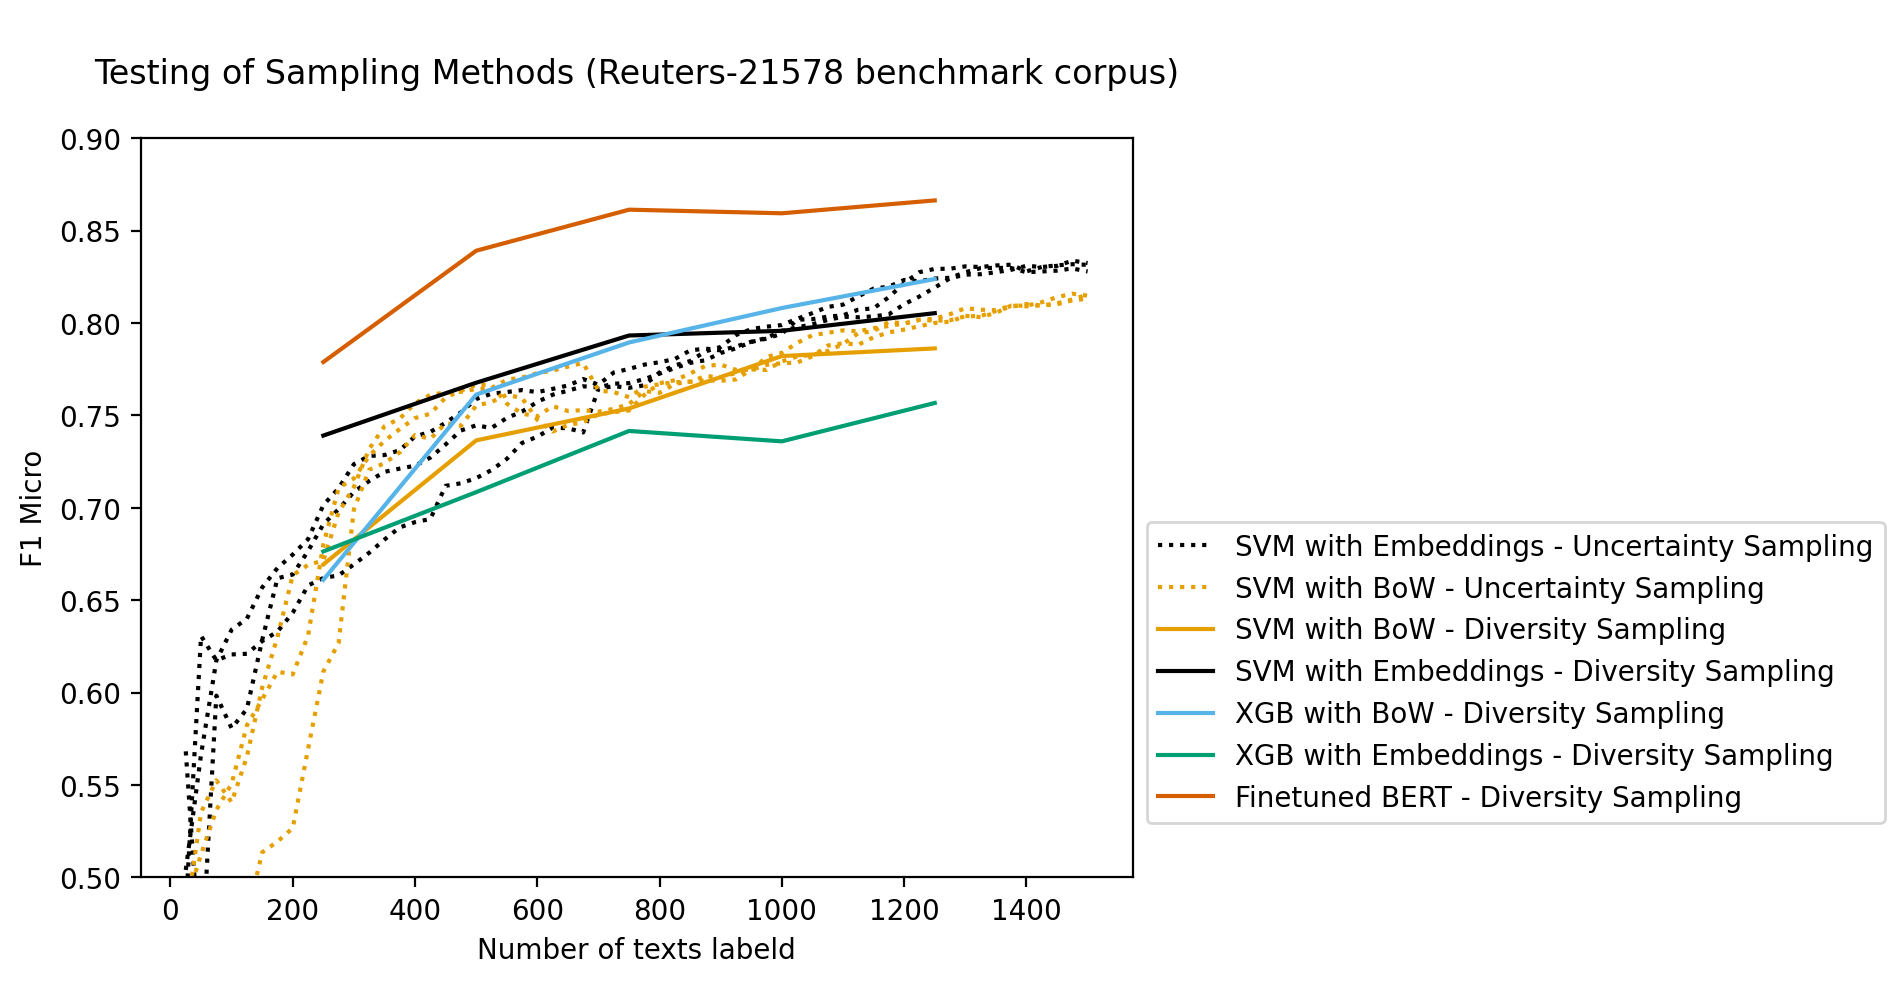

In [18]:
plt.plot(uncert_svm_embeddings["n"], uncert_svm_embeddings["f1_micro"], c = "#000000", linestyle = "dotted", label = "SVM with Embeddings - Uncertainty Sampling")
plt.plot(uncert_svm_embeddings_1["n"], uncert_svm_embeddings_1["f1_micro"], c = "#000000", linestyle = "dotted")
plt.plot(uncert_svm_embeddings_2["n"], uncert_svm_embeddings_2["f1_micro"], c = "#000000", linestyle = "dotted")

plt.plot(uncert_svm_bow["n"], uncert_svm_bow["f1_micro"], c = "#E69F00", linestyle = "dotted", label = "SVM with BoW - Uncertainty Sampling")
plt.plot(uncert_svm_bow_1["n"], uncert_svm_bow_1["f1_micro"], c = "#E69F00", linestyle = "dotted")
plt.plot(uncert_svm_bow_2["n"], uncert_svm_bow_2["f1_micro"], c = "#E69F00", linestyle = "dotted")

plt.plot(kmsubset_svm_bow["n"], kmsubset_svm_bow["f1_micro"], c = "#E69F00", linestyle = "solid", label = "SVM with BoW - Diversity Sampling")
plt.plot(kmsubset_svm_embeddings["n"], kmsubset_svm_embeddings["f1_micro"], c = "#000000", linestyle = "solid", label = "SVM with Embeddings - Diversity Sampling")

plt.plot(kmsubset_xgb_bow["n"], kmsubset_xgb_bow["f1_micro"], c = "#56B4E9", linestyle = "solid", label = "XGB with BoW - Diversity Sampling")
plt.plot(kmsubset_xgb_embeddings["n"], kmsubset_xgb_embeddings["f1_micro"], c = "#009E73", linestyle = "solid", label = "XGB with Embeddings - Diversity Sampling")

plt.plot(kmsubset_transformer_50["n"], kmsubset_transformer_50["f1_micro"], c = "#D55E00", linestyle = "solid", label = "Finetuned BERT - Diversity Sampling")

plt.title("\nTesting of Sampling Methods (Reuters-21578 benchmark corpus)\n")
plt.xlabel("Number of texts labeld")
plt.ylabel("F1 Micro")
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.ylim([.5,.9])

(0.0, 0.5)

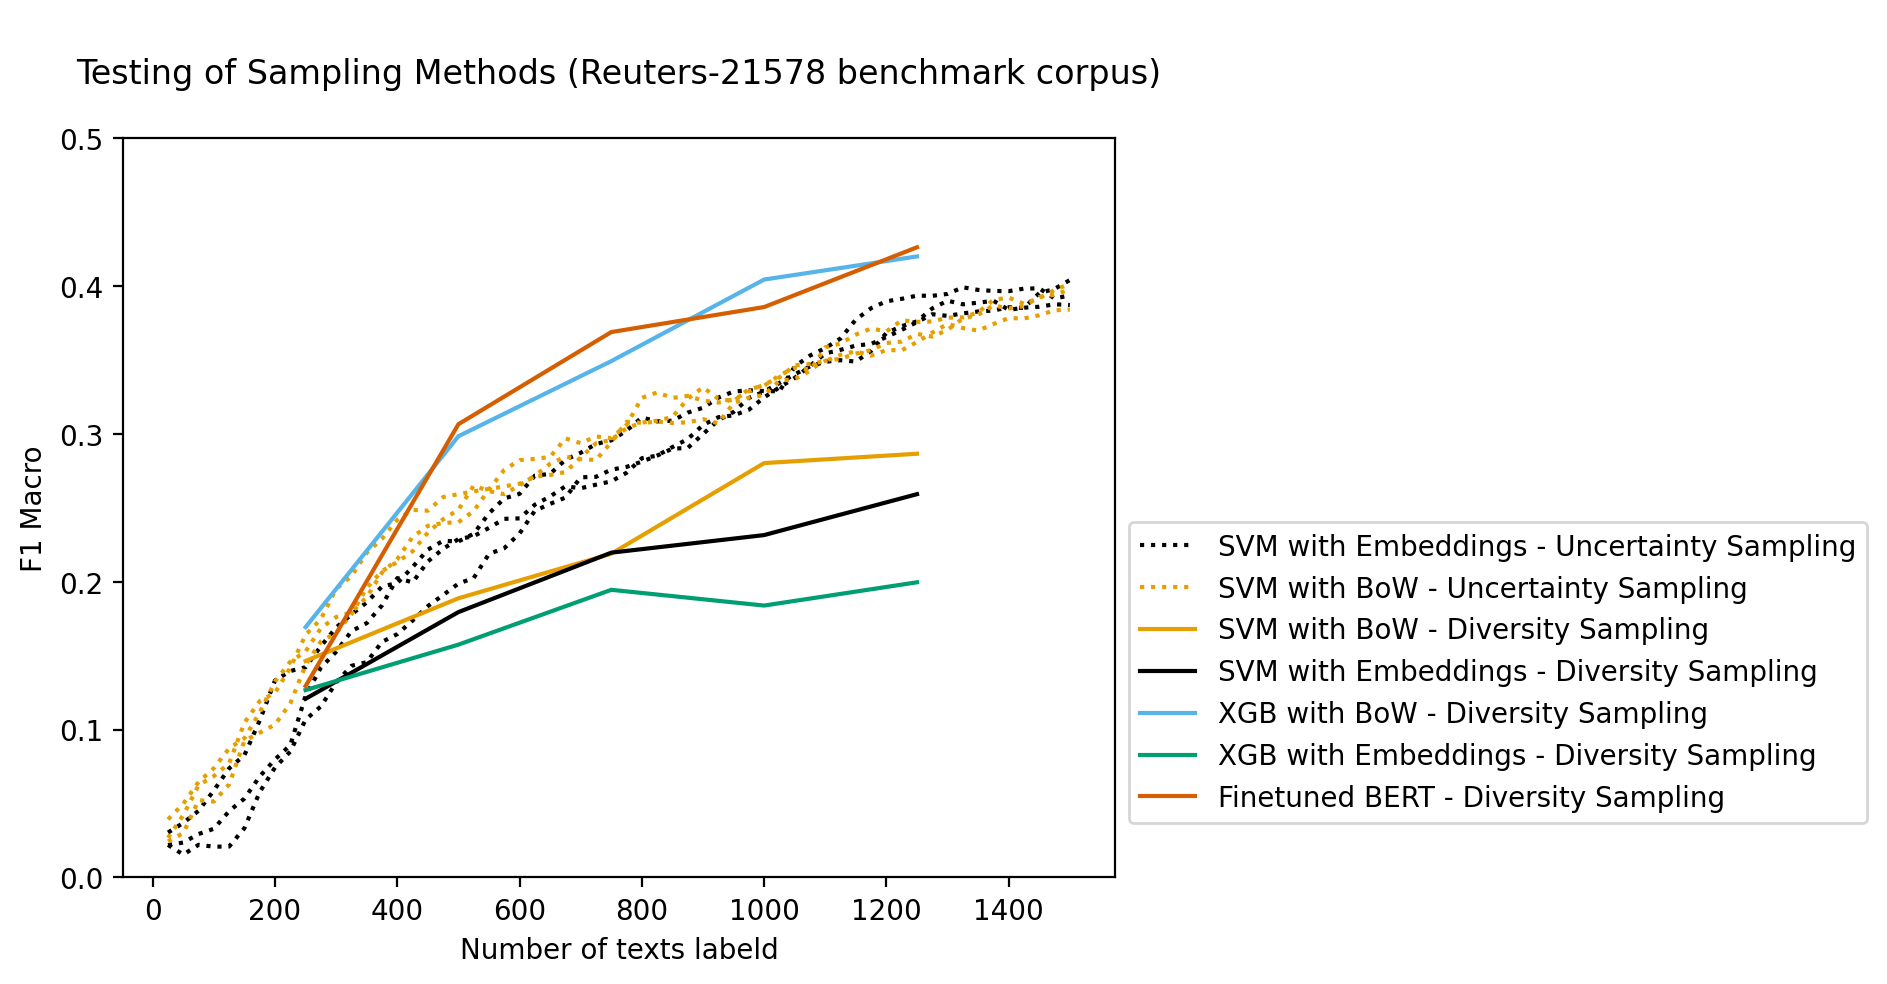

In [19]:
plt.plot(uncert_svm_embeddings["n"], uncert_svm_embeddings["f1_macro"], c = "#000000", linestyle = "dotted", label = "SVM with Embeddings - Uncertainty Sampling")
plt.plot(uncert_svm_embeddings_1["n"], uncert_svm_embeddings_1["f1_macro"], c = "#000000", linestyle = "dotted")
plt.plot(uncert_svm_embeddings_2["n"], uncert_svm_embeddings_2["f1_macro"], c = "#000000", linestyle = "dotted")

plt.plot(uncert_svm_bow["n"], uncert_svm_bow["f1_macro"], c = "#E69F00", linestyle = "dotted", label = "SVM with BoW - Uncertainty Sampling")
plt.plot(uncert_svm_bow_1["n"], uncert_svm_bow_1["f1_macro"], c = "#E69F00", linestyle = "dotted")
plt.plot(uncert_svm_bow_2["n"], uncert_svm_bow_2["f1_macro"], c = "#E69F00", linestyle = "dotted")

plt.plot(kmsubset_svm_bow["n"], kmsubset_svm_bow["f1_macro"], c = "#E69F00", linestyle = "solid", label = "SVM with BoW - Diversity Sampling")
plt.plot(kmsubset_svm_embeddings["n"], kmsubset_svm_embeddings["f1_macro"], c = "#000000", linestyle = "solid", label = "SVM with Embeddings - Diversity Sampling")

plt.plot(kmsubset_xgb_bow["n"], kmsubset_xgb_bow["f1_macro"], c = "#56B4E9", linestyle = "solid", label = "XGB with BoW - Diversity Sampling")
plt.plot(kmsubset_xgb_embeddings["n"], kmsubset_xgb_embeddings["f1_macro"], c = "#009E73", linestyle = "solid", label = "XGB with Embeddings - Diversity Sampling")

plt.plot(kmsubset_transformer_50["n"], kmsubset_transformer_50["f1_macro"], c = "#D55E00", linestyle = "solid", label = "Finetuned BERT - Diversity Sampling")

plt.title("\nTesting of Sampling Methods (Reuters-21578 benchmark corpus)\n")
plt.xlabel("Number of texts labeld")
plt.ylabel("F1 Macro")

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.ylim([0, .5])

In [42]:
measure = "f1_macro"
for n in [250,500,750,1000,1250]:
    print(str(round((uncert_svm_bow[measure][int(n/25)-1] + uncert_svm_bow[measure][int(n/25)-1] + uncert_svm_bow[measure][int(n/25)-1])/3, 2))+ "&", end="")

0.14&0.25&0.29&0.33&0.38&

In [43]:
measure = "f1_macro"
for n in [250,500,750,1000,1250]:
    print(str(round((uncert_svm_embeddings[measure][int(n/25)-1] + uncert_svm_embeddings_1[measure][int(n/25)-1] + uncert_svm_embeddings_2[measure][int(n/25)-1])/3, 2))+ "&", end="")

0.12&0.22&0.28&0.33&0.38&

In [38]:
kmsubset_svm_bow.keys()

dict_keys(['n', 'accuracy', 'f1_micro', 'f1_macro'])

In [25]:
kmsubset_svm_bow["accuracy"]

[0.5935740311361378,
 0.6581649552832064,
 0.6740642596886386,
 0.7035442199403776,
 0.7101689301093077]

In [36]:
def get_res(var, metric):
    for i in var:
        for j in i[metric]:
            if metric == "accuracy":
                print(str(round(j*100,2)) + "&", end="")
            else:
                print(str(round(j,2)) + "&", end="")
        print(r"\\")

In [37]:
get_res(
    [kmsubset_svm_bow,
    kmsubset_svm_embeddings,
    kmsubset_xgb_bow,
    kmsubset_xgb_embeddings,
    kmsubset_transformer_50], 
    "accuracy")

59.36&65.82&67.41&70.35&71.02&\\
66.41&69.36&72.54&72.97&73.83&\\
55.02&64.26&67.61&69.59&72.37&\\
58.2&62.31&64.33&65.12&67.67&\\
71.28&78.5&81.32&81.45&81.22&\\


In [39]:
get_res(
    [kmsubset_svm_bow,
    kmsubset_svm_embeddings,
    kmsubset_xgb_bow,
    kmsubset_xgb_embeddings,
    kmsubset_transformer_50], 
    "f1_micro")

0.67&0.74&0.75&0.78&0.79&\\
0.74&0.77&0.79&0.8&0.81&\\
0.66&0.76&0.79&0.81&0.82&\\
0.68&0.71&0.74&0.74&0.76&\\
0.78&0.84&0.86&0.86&0.87&\\


In [44]:
get_res(
    [kmsubset_svm_bow,
    kmsubset_svm_embeddings,
    kmsubset_xgb_bow,
    kmsubset_xgb_embeddings,
    kmsubset_transformer_50], 
    "f1_macro")

0.15&0.19&0.22&0.28&0.29&\\
0.12&0.18&0.22&0.23&0.26&\\
0.17&0.3&0.35&0.4&0.42&\\
0.13&0.16&0.19&0.18&0.2&\\
0.13&0.31&0.37&0.39&0.43&\\
